In [1]:
import pandas as pd
import numpy as np

In [9]:
#导入经过数据预处理和特征工程的数据
df = pd.read_csv(r"C:\Users\Administrator\Desktop\数据挖掘\data_.csv",index_col=0)

In [10]:
df.head()

,0_x,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,0_y
0,-0.390704,-0.201280,-0.799040,0.772736,-0.096287,-1.119544,-0.377614,-1.019579,-0.679865,-0.287527,...,-0.545560,-0.176020,-0.506717,-0.458513,0.122106,-0.144873,0.338192,-0.259763,-0.385553,1
1,-0.165808,-0.815437,-0.572465,0.030293,0.048196,0.549394,-0.605482,1.008921,-0.440776,0.144876,...,1.169343,0.258752,0.028600,-0.458513,0.485705,0.741561,-0.198579,-0.314891,-0.580758,0
2,-0.165808,-0.815437,0.107262,-1.454592,1.878320,-0.887747,-0.662449,-0.581773,0.276492,-1.224401,...,-1.307739,-1.444106,-0.506717,0.241049,-5.453085,3.803787,1.411734,0.291510,1.956912,1
3,-0.390704,0.412876,0.560412,1.090925,-0.722382,1.105706,-0.662449,1.184043,0.754671,-0.071325,...,-0.164471,1.780456,0.028600,0.590830,0.546305,-1.031307,-0.735350,-0.425145,-1.361580,0
4,-0.390704,1.027033,-0.572465,-1.136402,1.781998,-0.563231,-0.092780,0.016562,-0.440776,-0.719930,...,-1.307739,-0.212251,-0.506717,-0.341919,0.697805,3.642617,-0.198579,-0.094381,0.590474,1


In [20]:
X = df.iloc[:,0:20]
y = df.iloc[:,20]

In [25]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


模型名称: Support Vector Machine Classifier
准确率:0.7585,精确率:0.7720,召回率:0.7388,f1-score:0.7550,auc:0.7586


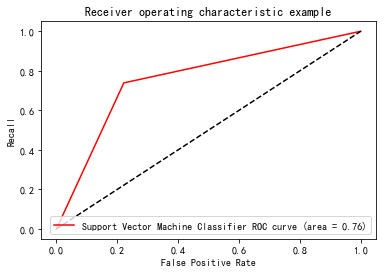

模型名称: LogisticRegression
准确率:0.6910,精确率:0.7162,召回率:0.6404,f1-score:0.6762,auc:0.6914


C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


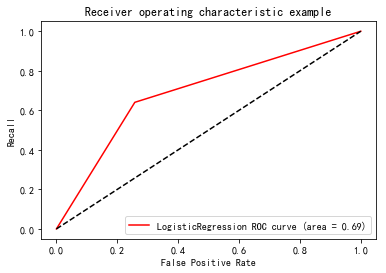

模型名称: Xgboost Classifier
准确率:0.8325,精确率:0.8533,召回率:0.8062,f1-score:0.8291,auc:0.8327


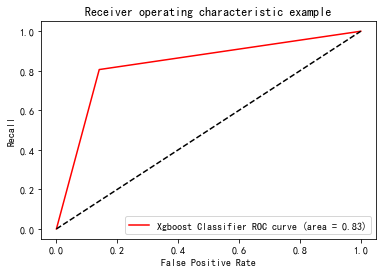

模型名称: Decision Tree Classifier
准确率:0.7458,精确率:0.7451,召回率:0.7528,f1-score:0.7490,auc:0.7457


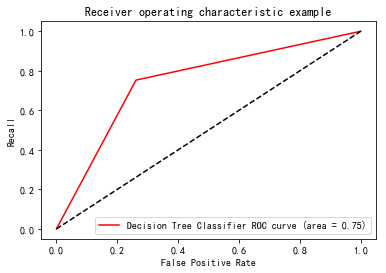

模型名称: Random Forest Classifier
准确率:0.8170,精确率:0.8571,召回率:0.7640,f1-score:0.8079,auc:0.8174


C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


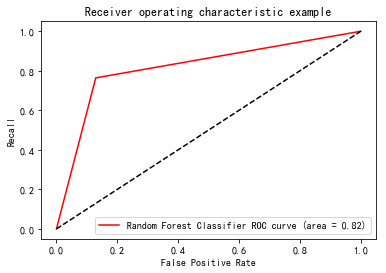

In [62]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier as XGBC
from sklearn import metrics
import matplotlib.pyplot as plt

classifiers = {
        'LogisticRegression' : LR(),
        'Support Vector Machine Classifier' : SVC(),
        'Decision Tree Classifier' : DecisionTreeClassifier(),
        'Random Forest Classifier' : RandomForestClassifier(),
        'Xgboost Classifier' : XGBC()
        }
for model_name,model in classifiers.items():
    clf = model.fit(Xtrain,Ytrain)
    print('模型名称:',model_name)
    Ytest_pred = clf.predict(Xtest)
    acc = metrics.accuracy_score(Ytest,Ytest_pred)
    precision = metrics.precision_score(Ytest,Ytest_pred)
    recall = metrics.recall_score(Ytest,Ytest_pred)
    f1 = metrics.f1_score(Ytest,Ytest_pred)
    auc = metrics.roc_auc_score(Ytest,Ytest_pred)
    print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc,precision,recall,f1,auc))
    
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score as AUC

    plt.rcParams['font.sans-serif'] = 'SimHei'
    colors = ["b","g","r","c","m"]
    plt.figure()

    #plt.figure()  #只建立一个画布，将所有的ROC曲线在一个画布上画出来
    FPR, recall, thresholds = roc_curve(Ytest,Ytest_pred, pos_label=1)
    area = AUC(Ytest,Ytest_pred)
    plt.plot(FPR, recall,color='red',label='{} ROC curve (area = {:.2f})'.format(model_name,area))
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('Recall')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()